# Wave1 Exploratory Data Analysis on dilated 50 data

Here we understand more about the data and how it is distrubuted.
Wave1 data are extracted features from raw images.
These images were processed via Cellprofiler pipelines

Specifically wave1 is looking at Gasdermin-D and Nuclei Staining from a cell painting experiment.

Further, nuclei were dilated using multiple values of pixel dilation. Here we use data for the 50 pixel dialation

In [2]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

sys.path.append("..")
from utils.utils import *

In [3]:
# Import data with low memory arg as the data are large
df = pd.read_csv(
    "../../Extracted Features (CSV files)/interstellar_wave1_dilate50_sc.csv.gz",
    low_memory=False,
)

In [4]:
# Call function to display df shape and # of replicates present
df_stats(df)

The dimensions of the data are: (68944, 841)
Number of total missing values across all columns: 6611


,Metadata_wellName,Metadata_row,Metadata_col,Metadata_alias,Metadata_treatment,Metadata_dose,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_TranslocatedNuclei_Parent_DilatedNuclei,Metadata_TranslocatedNuclei_Parent_Nuclei,Metadata_DilatedNuclei_Number_Object_Number,Metadata_Nuclei_Number_Object_Number,TranslocatedNuclei_Number_Object_Number,TranslocatedNuclei_AreaShape_Area,TranslocatedNuclei_AreaShape_BoundingBoxArea,TranslocatedNuclei_AreaShape_BoundingBoxMaximum_X,TranslocatedNuclei_AreaShape_BoundingBoxMaximum_Y,TranslocatedNuclei_AreaShape_BoundingBoxMinimum_X,TranslocatedNuclei_AreaShape_BoundingBoxMinimum_Y,TranslocatedNuclei_AreaShape_Center_X,TranslocatedNuclei_AreaShape_Center_Y,TranslocatedNuclei_AreaShape_Compactness,TranslocatedNuclei_AreaShape_ConvexArea,TranslocatedNuclei_AreaShape_Eccentricity,TranslocatedNuclei_AreaShape_EquivalentDiameter,TranslocatedNuclei_AreaShape_EulerNumber,TranslocatedNuclei_AreaShape_Extent,TranslocatedNuclei_AreaShape_FormFactor,TranslocatedNuclei_AreaShape_MajorAxisLength,TranslocatedNuclei_AreaShape_MaxFeretDiameter,TranslocatedNuclei_AreaShape_MaximumRadius,TranslocatedNuclei_AreaShape_MeanRadius,TranslocatedNuclei_AreaShape_MedianRadius,TranslocatedNuclei_AreaShape_MinFeretDiameter,TranslocatedNuclei_AreaShape_MinorAxisLength,TranslocatedNuclei_AreaShape_Orientation,TranslocatedNuclei_AreaShape_Perimeter,TranslocatedNuclei_AreaShape_Solidity,TranslocatedNuclei_AreaShape_Zernike_0_0,TranslocatedNuclei_AreaShape_Zernike_1_1,TranslocatedNuclei_AreaShape_Zernike_2_0,TranslocatedNuclei_AreaShape_Zernike_2_2,TranslocatedNuclei_AreaShape_Zernike_3_1,TranslocatedNuclei_AreaShape_Zernike_3_3,TranslocatedNuclei_AreaShape_Zernike_4_0,TranslocatedNuclei_AreaShape_Zernike_4_2,TranslocatedNuclei_AreaShape_Zernike_4_4,TranslocatedNuclei_AreaShape_Zernike_5_1,TranslocatedNuclei_AreaShape_Zernike_5_3,TranslocatedNuclei_AreaShape_Zernike_5_5,TranslocatedNuclei_AreaShape_Zernike_6_0,TranslocatedNuclei_AreaShape_Zernike_6_2,TranslocatedNuclei_AreaShape_Zernike_6_4,TranslocatedNuclei_AreaShape_Zernike_6_6,TranslocatedNuclei_AreaShape_Zernike_7_1,TranslocatedNuclei_AreaShape_Zernike_7_3,TranslocatedNuclei_AreaShape_Zernike_7_5,TranslocatedNuclei_AreaShape_Zernike_7_7,TranslocatedNuclei_AreaShape_Zernike_8_0,TranslocatedNuclei_AreaShape_Zernike_8_2,TranslocatedNuclei_AreaShape_Zernike_8_4,TranslocatedNuclei_AreaShape_Zernike_8_6,TranslocatedNuclei_AreaShape_Zernike_8_8,TranslocatedNuclei_AreaShape_Zernike_9_1,TranslocatedNuclei_AreaShape_Zernike_9_3,TranslocatedNuclei_AreaShape_Zernike_9_5,TranslocatedNuclei_AreaShape_Zernike_9_7,TranslocatedNuclei_AreaShape_Zernike_9_9,TranslocatedNuclei_Correlation_Correlation_CorrDNA_CorrGasdermnD,TranslocatedNuclei_Correlation_Costes_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_Costes_CorrGasderminD_CorrDNA,TranslocatedNuclei_Correlation_K_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_K_CorrGasderminD_CorrDNA,TranslocatedNuclei_Correlation_Manders_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_Manders_CorrGasderminD_CorrDNA,TranslocatedNuclei_Correlation_Overlap_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_RWC_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_RWC_CorrGasderminD_CorrDNA,TranslocatedNuclei_Granularity_10_CorrDNA,TranslocatedNuclei_Granularity_10_CorrGasderminD,TranslocatedNuclei_Granularity_11_CorrDNA,TranslocatedNuclei_Granularity_11_CorrGasderminD,TranslocatedNuclei_Granularity_12_CorrDNA,TranslocatedNuclei_Granularity_12_CorrGasderminD,TranslocatedNuclei_Granularity_13_CorrDNA,TranslocatedNuclei_Granularity_13_CorrGasderminD,TranslocatedNuclei_Granularity_14_CorrDNA,TranslocatedNuclei_Granularity_14_CorrGasderminD,TranslocatedNuclei_Granularity_15_CorrDNA,TranslocatedNuclei_Granularity_15_CorrGasderminD,TranslocatedNuclei_Granularity_16_CorrDNA,TranslocatedNuclei_Granularity_16_CorrGasderminD,TranslocatedNuclei_Granularity_1_CorrDNA,TranslocatedNuclei_Granularity_1_CorrGasderminD,TranslocatedNuclei_G

In [5]:
# Drop na and reindex accordingly
df = df.dropna()
df.reindex()
# Check for Nans again
df_stats(df)

The dimensions of the data are: (68782, 841)
Number of total missing values across all columns: 0


,Metadata_wellName,Metadata_row,Metadata_col,Metadata_alias,Metadata_treatment,Metadata_dose,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_TranslocatedNuclei_Parent_DilatedNuclei,Metadata_TranslocatedNuclei_Parent_Nuclei,Metadata_DilatedNuclei_Number_Object_Number,Metadata_Nuclei_Number_Object_Number,TranslocatedNuclei_Number_Object_Number,TranslocatedNuclei_AreaShape_Area,TranslocatedNuclei_AreaShape_BoundingBoxArea,TranslocatedNuclei_AreaShape_BoundingBoxMaximum_X,TranslocatedNuclei_AreaShape_BoundingBoxMaximum_Y,TranslocatedNuclei_AreaShape_BoundingBoxMinimum_X,TranslocatedNuclei_AreaShape_BoundingBoxMinimum_Y,TranslocatedNuclei_AreaShape_Center_X,TranslocatedNuclei_AreaShape_Center_Y,TranslocatedNuclei_AreaShape_Compactness,TranslocatedNuclei_AreaShape_ConvexArea,TranslocatedNuclei_AreaShape_Eccentricity,TranslocatedNuclei_AreaShape_EquivalentDiameter,TranslocatedNuclei_AreaShape_EulerNumber,TranslocatedNuclei_AreaShape_Extent,TranslocatedNuclei_AreaShape_FormFactor,TranslocatedNuclei_AreaShape_MajorAxisLength,TranslocatedNuclei_AreaShape_MaxFeretDiameter,TranslocatedNuclei_AreaShape_MaximumRadius,TranslocatedNuclei_AreaShape_MeanRadius,TranslocatedNuclei_AreaShape_MedianRadius,TranslocatedNuclei_AreaShape_MinFeretDiameter,TranslocatedNuclei_AreaShape_MinorAxisLength,TranslocatedNuclei_AreaShape_Orientation,TranslocatedNuclei_AreaShape_Perimeter,TranslocatedNuclei_AreaShape_Solidity,TranslocatedNuclei_AreaShape_Zernike_0_0,TranslocatedNuclei_AreaShape_Zernike_1_1,TranslocatedNuclei_AreaShape_Zernike_2_0,TranslocatedNuclei_AreaShape_Zernike_2_2,TranslocatedNuclei_AreaShape_Zernike_3_1,TranslocatedNuclei_AreaShape_Zernike_3_3,TranslocatedNuclei_AreaShape_Zernike_4_0,TranslocatedNuclei_AreaShape_Zernike_4_2,TranslocatedNuclei_AreaShape_Zernike_4_4,TranslocatedNuclei_AreaShape_Zernike_5_1,TranslocatedNuclei_AreaShape_Zernike_5_3,TranslocatedNuclei_AreaShape_Zernike_5_5,TranslocatedNuclei_AreaShape_Zernike_6_0,TranslocatedNuclei_AreaShape_Zernike_6_2,TranslocatedNuclei_AreaShape_Zernike_6_4,TranslocatedNuclei_AreaShape_Zernike_6_6,TranslocatedNuclei_AreaShape_Zernike_7_1,TranslocatedNuclei_AreaShape_Zernike_7_3,TranslocatedNuclei_AreaShape_Zernike_7_5,TranslocatedNuclei_AreaShape_Zernike_7_7,TranslocatedNuclei_AreaShape_Zernike_8_0,TranslocatedNuclei_AreaShape_Zernike_8_2,TranslocatedNuclei_AreaShape_Zernike_8_4,TranslocatedNuclei_AreaShape_Zernike_8_6,TranslocatedNuclei_AreaShape_Zernike_8_8,TranslocatedNuclei_AreaShape_Zernike_9_1,TranslocatedNuclei_AreaShape_Zernike_9_3,TranslocatedNuclei_AreaShape_Zernike_9_5,TranslocatedNuclei_AreaShape_Zernike_9_7,TranslocatedNuclei_AreaShape_Zernike_9_9,TranslocatedNuclei_Correlation_Correlation_CorrDNA_CorrGasdermnD,TranslocatedNuclei_Correlation_Costes_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_Costes_CorrGasderminD_CorrDNA,TranslocatedNuclei_Correlation_K_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_K_CorrGasderminD_CorrDNA,TranslocatedNuclei_Correlation_Manders_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_Manders_CorrGasderminD_CorrDNA,TranslocatedNuclei_Correlation_Overlap_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_RWC_CorrDNA_CorrGasderminD,TranslocatedNuclei_Correlation_RWC_CorrGasderminD_CorrDNA,TranslocatedNuclei_Granularity_10_CorrDNA,TranslocatedNuclei_Granularity_10_CorrGasderminD,TranslocatedNuclei_Granularity_11_CorrDNA,TranslocatedNuclei_Granularity_11_CorrGasderminD,TranslocatedNuclei_Granularity_12_CorrDNA,TranslocatedNuclei_Granularity_12_CorrGasderminD,TranslocatedNuclei_Granularity_13_CorrDNA,TranslocatedNuclei_Granularity_13_CorrGasderminD,TranslocatedNuclei_Granularity_14_CorrDNA,TranslocatedNuclei_Granularity_14_CorrGasderminD,TranslocatedNuclei_Granularity_15_CorrDNA,TranslocatedNuclei_Granularity_15_CorrGasderminD,TranslocatedNuclei_Granularity_16_CorrDNA,TranslocatedNuclei_Granularity_16_CorrGasderminD,TranslocatedNuclei_Granularity_1_CorrDNA,TranslocatedNuclei_Granularity_1_CorrGasderminD,TranslocatedNuclei_G

In [6]:
# Understand categorical data such as treatment and dosing
df[["Metadata_treatment", "Metadata_dose"]].drop_duplicates()

,Metadata_treatment,Metadata_dose
0,LPS,10µg/ml
2493,LPS,1µg/ml
4956,H2O2,500µM
5117,H2O2,50µM
7374,ATP,1mM
9948,ATP,0.1mM
12549,Flagellin,1µg/ml
14858,Flagellin,0.1µg/ml
35367,Disulfiram,2.5µM
36627,Disulfiram,0.1µM


In [7]:
# create a list with only columns from the data frame that start with "Metadata"
# Code by Jenna Tomkinson
df_subset = df.sample(n=1500)

df_metadata = list(df_subset.columns[df_subset.columns.str.startswith("Metadata")])

# define which columns are data and which are descriptive
df_descriptive = df_subset[df_metadata]
df_values = df_subset.drop(columns=df_metadata)

treatment_ids = df_descriptive["Metadata_treatment"]

In [8]:
# Cluster data
# clustering code adapted from https://www.kaggle.com/code/aussie84/clustering-with-kmeans-pca-tsne

kmeans = KMeans(n_clusters=9)
clustering_ori = kmeans.fit_predict(df_values)

X = df_values
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsneFull = pd.DataFrame(Xtsne)

dftsneFull["cluster"] = clustering_ori
dftsneFull.columns = ["x1", "x2", "cluster"]
dftsneFull["Treatment"] = (
    df_descriptive["Metadata_treatment"].reset_index().drop("index", axis=1)
)

/home/lippincm/miniconda3/envs/Interstellar/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


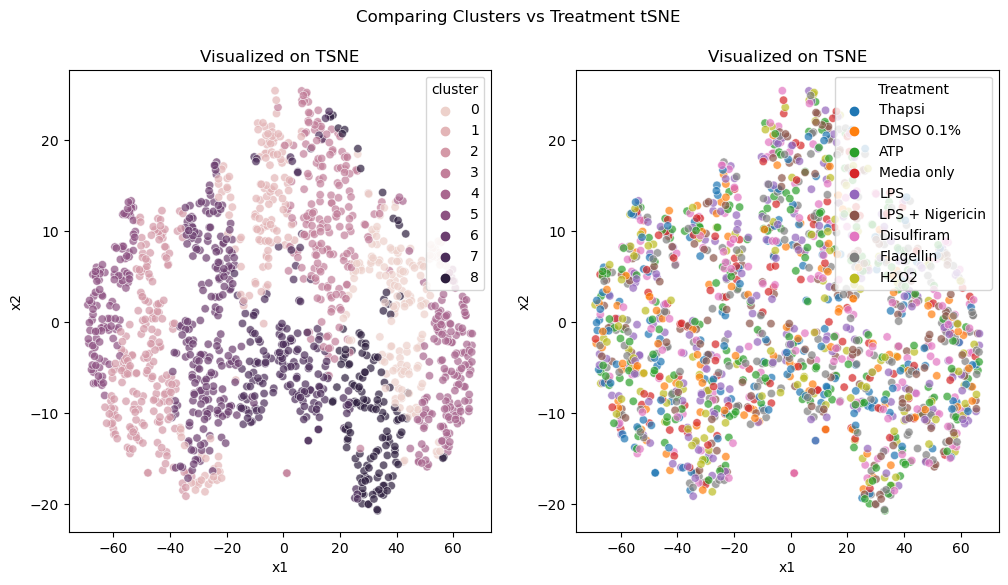

In [9]:
# Figure Showing tSNE of Clusters vs Treatment
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
plot = sns.scatterplot(
    data=dftsneFull, x="x1", y="x2", hue="cluster", legend="full", alpha=0.7, ax=ax[0]
)
ax[0].set_title("Visualized on TSNE")
plot = sns.scatterplot(
    data=dftsneFull, x="x1", y="x2", hue="Treatment", legend="full", alpha=0.7, ax=ax[1]
)
ax[1].set_title("Visualized on TSNE")
fig.suptitle("Comparing Clusters vs Treatment tSNE")
df_values["cluster"] = clustering_ori

Above tSNE shows that based on dimensionality reduction, there is no observable difference in treated cells. More sensitive methods such as machine learning models will need to be employed to achieve such.

/home/lippincm/Documents/ML/Interstellar_Analysis/0.Exploratory_Data_Analysis/utils/utils.py:56: RuntimeWarning: invalid value encountered in double_scalars
  mean_overall_std = mean_overall / mean_overall
/home/lippincm/Documents/ML/Interstellar_Analysis/0.Exploratory_Data_Analysis/utils/utils.py:57: RuntimeWarning: invalid value encountered in double_scalars
  mean_cluster_std = mean_cluster / mean_overall
/home/lippincm/Documents/ML/Interstellar_Analysis/0.Exploratory_Data_Analysis/utils/utils.py:56: RuntimeWarning: invalid value encountered in double_scalars
  mean_overall_std = mean_overall / mean_overall
/home/lippincm/Documents/ML/Interstellar_Analysis/0.Exploratory_Data_Analysis/utils/utils.py:57: RuntimeWarning: invalid value encountered in double_scalars
  mean_cluster_std = mean_cluster / mean_overall
/home/lippincm/Documents/ML/Interstellar_Analysis/0.Exploratory_Data_Analysis/utils/utils.py:56: RuntimeWarning: invalid value encountered in double_scalars
  mean_overall_std 

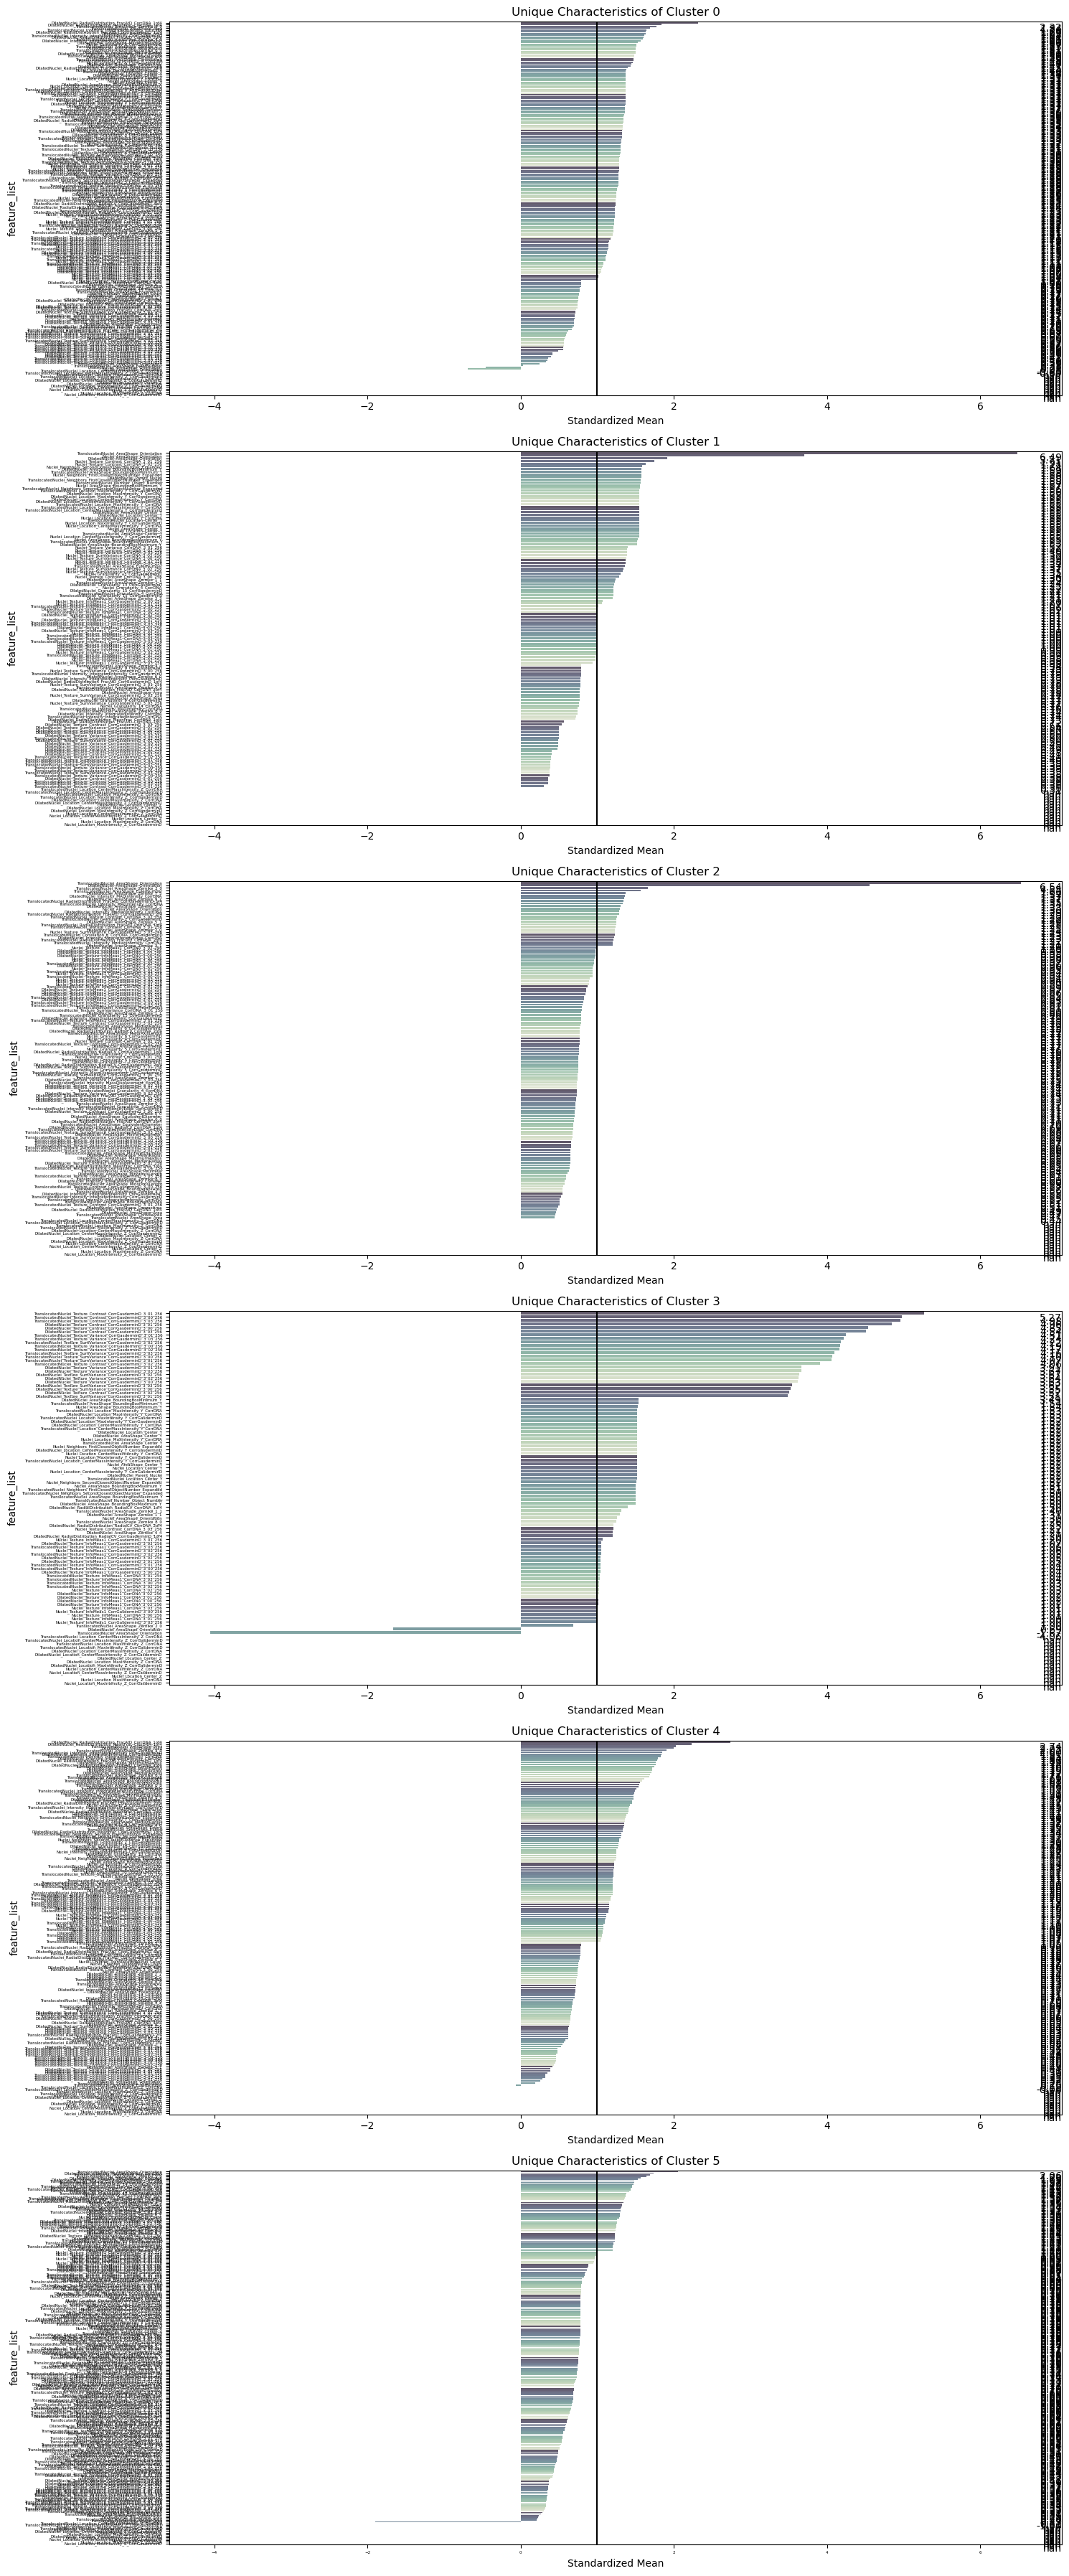

In [10]:
# callable function for graphing features that contribute most to each cluster's grouping
plot_features_all_cluster(
    df=df_values, label_col="cluster", n_clusters=6, sensitivity=0.2
)

Each Cluster has a similar distrubution in amount of features affecting its grouping